## Demand Survey and Surplus ##

The idea for this mini-lab is to derive a Demand curve from student input from the first day of class, and to use that to motivate the concept of surplus.


In [68]:
from datascience import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
import sympy
solve = lambda x,y: sympy.solve(x-y)[0] if len(sympy.solve(x-y))==1 else "Not Single Solution"
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
plt.style.use("seaborn-muted")

Lets start off with the demand from a student survey:
 - we had 4 "goods" and a range of prices available for each good
 - students made bids on their willingness to pay for each of the 4 goods
 - the dataset for Fall 2021 has something like 83 observations
 - this dataset has been exported and we have to read it in here:

In [163]:
demand = Table.read_table("demand_table_2021.csv")
demand


greek tickets,iphone 13,green tea kit kat,burrito
$125,$1750,1,20
$200,$750,2,10
$175,$1750,1.25,12.5
$150,$2000,1,10
$150,$750,1,5
$150,$1250,1.5,15
$50,$750,1,7.5
$125,$1500,1.25,12.5
$100,$1000,0.5,7.5
$200,$2000,1,15


Where last we left off we had to do a little *data cleaning* because it seemed like there were some missing values - lets try to find them!

In [70]:
demand.show()

greek tickets,iphone 13,green tea kit kat,burrito
$125,$1750,1,20
$200,$750,2,10
$175,$1750,1.25,12.5
$150,$2000,1,10
$150,$750,1,5
$150,$1250,1.5,15
$50,$750,1,7.5
$125,$1500,1.25,12.5
$100,$1000,0.5,7.5
$200,$2000,1,15


Looks like there is a "nan" in row 15 

Because in Python we are zero-indexed, lets try deleting row 14

And then check to see that it worked

In [165]:
demand = demand.exclude(14)
demand.show()

greek tickets,iphone 13,green tea kit kat,burrito
$125,$1750,1,20
$200,$750,2,10
$175,$1750,1.25,12.5
$150,$2000,1,10
$150,$750,1,5
$150,$1250,1.5,15
$50,$750,1,7.5
$125,$1500,1.25,12.5
$100,$1000,0.5,7.5
$200,$2000,1,15


The next problem is that the '$' signs have made it so that some cells are read in as strings 
- please excuse us, but we are going to have to switch over to Pandas to clean this part up
- datascience makes it easy to save a Table as a DataFrame

In [168]:
demand_df = Table.to_df(demand)
demand_df

,greek tickets,iphone 13,green tea kit kat,burrito
0,$125,$1750,1.00,20.0
1,$200,$750,2.00,10.0
2,$175,$1750,1.25,12.5
3,$150,$2000,1.00,10.0
4,$150,$750,1.00,5.0
...,...,...,...,...
75,$100,$500,0.25,5.0
76,$200,$3000,2.00,20.0
77,$50,$250,0.25,2.5
78,$75,$750,0.50,7.5


We can first remove the "$" sign by just replacing it with nothing

In [169]:
demand_df['greek tickets'] = demand_df['greek tickets'].str.replace('$', '')
demand_df['iphone 13'] = demand_df['iphone 13'].str.replace('$', '')
demand_df

,greek tickets,iphone 13,green tea kit kat,burrito
0,125,1750,1.00,20.0
1,200,750,2.00,10.0
2,175,1750,1.25,12.5
3,150,2000,1.00,10.0
4,150,750,1.00,5.0
...,...,...,...,...
75,100,500,0.25,5.0
76,200,3000,2.00,20.0
77,50,250,0.25,2.5
78,75,750,0.50,7.5


And then Pandas will allow us to change the data type to Numeric from String
- to be sure lets apply it to all of the columns

In [170]:
cols = demand_df.columns
demand_df[cols] = demand_df[cols].apply(pd.to_numeric)
demand_df

,greek tickets,iphone 13,green tea kit kat,burrito
0,125,1750,1.00,20.0
1,200,750,2.00,10.0
2,175,1750,1.25,12.5
3,150,2000,1.00,10.0
4,150,750,1.00,5.0
...,...,...,...,...
75,100,500,0.25,5.0
76,200,3000,2.00,20.0
77,50,250,0.25,2.5
78,75,750,0.50,7.5


And now we can go back to Datascience Table - sorry about that Pandas excursion

In [172]:
# make a datascience Table from Pandas DF
DemandTable=Table.from_df(demand_df)
DemandTable

greek tickets,iphone 13,green tea kit kat,burrito
125,1750,1,20
200,750,2,10
175,1750,1.25,12.5
150,2000,1,10
150,750,1,5
150,1250,1.5,15
50,750,1,7.5
125,1500,1.25,12.5
100,1000,0.5,7.5
200,2000,1,15


Now we can just finish off by cleaning up the variable names

I like variable names to not have spaces in them 

In [173]:
DemandTable=DemandTable.relabel("greek tickets","GreekTix")
DemandTable=DemandTable.relabel("iphone 13","Iphone13")
DemandTable=DemandTable.relabel("green tea kit kat","GTKitkat")
DemandTable=DemandTable.relabel("burrito","Burrito")
DemandTable

GreekTix,Iphone13,GTKitkat,Burrito
125,1750,1,20
200,750,2,10
175,1750,1.25,12.5
150,2000,1,10
150,750,1,5
150,1250,1.5,15
50,750,1,7.5
125,1500,1.25,12.5
100,1000,0.5,7.5
200,2000,1,15


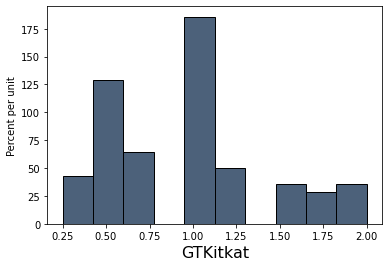

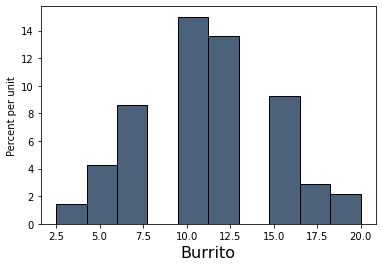

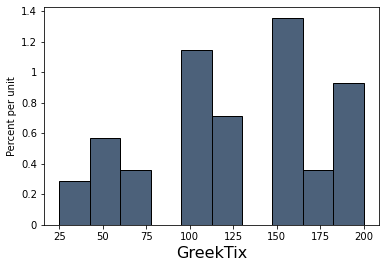

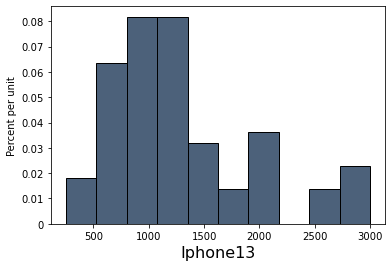

In [174]:
DemandTable.hist('GTKitkat')
DemandTable.hist('Burrito')
DemandTable.hist('GreekTix')
DemandTable.hist('Iphone13')

Lets start by looking just at Kitkats


And let't try to figure how how many people would buy GTKitkats at a given price? Let's assume that a person would be willing to buy the good at a price less than their bid price.  

In [175]:
KitkatsTable=DemandTable.select('GTKitkat')
KitkatsTable

GTKitkat
1
2
1.25
1
1
1.5
1
1.25
0.5
1


In [176]:
# Lets make a vector of prices
DemandGTK= Table().with_columns([
    'priceGTK',[0.25, 0.5, 0.75, 1.00, 1.25, 1.5,1.75,2],    
])
DemandGTK

priceGTK
0.25
0.5
0.75
1
1.25
1.5
1.75
2


In [177]:
# Count how many people are in each answer pool
KitkatsTable.group("GTKitkat")

GTKitkat,count
0.25,6
0.5,18
0.75,9
1,26
1.25,7
1.5,5
1.75,4
2,5


Now the number of each isnt the right quantity - we want to know the number of people who would pay at any given price or any lower price
 - people will pay "up to their bid price"
 - we consider the bid the maximum they are willing to pay, but will pay anything less
 - the bid was for a single unit, so for now we will disregard individuals buying multiple units
 
 We are going to do this by 
  1) flipping the order of the count column
  2) doing a cumulative function of all prices below
  3) flipping it back

In [178]:
#Cumulative Sum of how many people are willing to pay at a agiven price
Qdemand = np.flip(np.cumsum(np.flip(KitkatsTable.group("GTKitkat").column("count"))))

In [82]:
# # Lets count how many people would buy at a given price
## This is not the right way to code!
# Qdemand=np.count_nonzero(KitkatsTable.column('GTKitkat') <= 2)
# Qdemand=np.append(Qdemand,np.count_nonzero(KitkatsTable.column('GTKitkat') <= 1.75))
# Qdemand=np.append(Qdemand,np.count_nonzero(KitkatsTable.column('GTKitkat') <= 1.5))
# Qdemand=np.append(Qdemand,np.count_nonzero(KitkatsTable.column('GTKitkat') <= 1.25))
# Qdemand=np.append(Qdemand,np.count_nonzero(KitkatsTable.column('GTKitkat') <= 1))
# Qdemand=np.append(Qdemand,np.count_nonzero(KitkatsTable.column('GTKitkat') <= 0.75))
# Qdemand=np.append(Qdemand,np.count_nonzero(KitkatsTable.column('GTKitkat') <= 0.5))
# Qdemand=np.append(Qdemand,np.count_nonzero(KitkatsTable.column('GTKitkat') <= 0.25))
# Qdemand

In [179]:
# Combine the two into a single table
DemandGTK=DemandGTK.with_columns('Qdemand',Qdemand)
DemandGTK

priceGTK,Qdemand
0.25,80
0.5,74
0.75,56
1,47
1.25,21
1.5,14
1.75,9
2,5


## Lets looks at this Table and think about Consumer Surplus
Lets start from by flipping the order so that it is descending

And then let's suppose the price is $1 and lets measure how many people that were willing to pay more are getting a "surplus" by getting to by at this price that is lower than their "Willingness to Pay" / " Bid Price"


In [188]:
DemandGTK.sort("priceGTK", descending = True)

priceGTK,Qdemand
2,5
1.75,9
1.5,14
1.25,21
1,47
0.75,56
0.5,74
0.25,80


It looks like 
- 21 people would have been willing to pay up to $ 1.25

- 14 people would have been willing to pay up to $ 1.50

- 9 people would have been willing to pay up to $ 1.75

- 5 people would have been willing to pay up to $ 2

Lets add up these values


In [195]:
CS_counting = 22*0.25+15*0.5+9*0.75+5*1
print(' THe consumer surplus from counting consumers is ', CS_counting )

 THe consumer surplus from counting consumers is  24.75


Text(0.5, 1.0, 'Demand for Green Tea Kitkats')

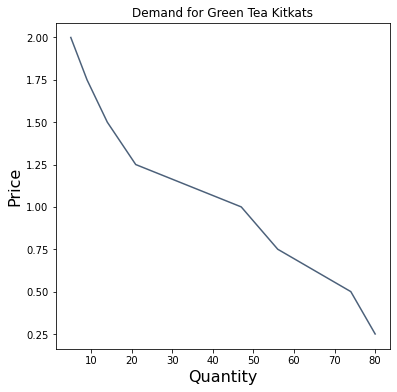

In [196]:
DemandGTK.plot("Qdemand", "priceGTK")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Green Tea Kitkats')

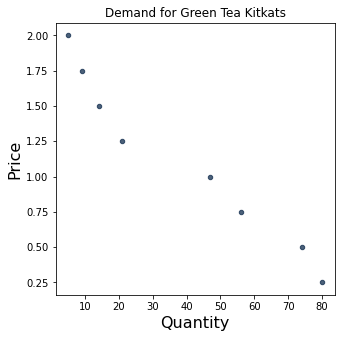

In [197]:
DemandGTK.scatter("Qdemand", "priceGTK")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Green Tea Kitkats');

Now that we have a demand curve - Let's create for a model that makes a linear approximation like we did in the homeworks

In [198]:
#What are the slope and intercept of the fit line
std_units = lambda a: (a - np.mean(a)) / np.std(a)
corr = lambda x, y: np.mean(std_units(x) * std_units(y))
slope = lambda x, y: corr(x, y) * np.std(y) / np.std(x)
intercept = lambda x, y: np.mean(y) - slope(x, y) * np.mean(x)

In [199]:
gt_slope = slope(DemandGTK["Qdemand"], DemandGTK["priceGTK"])
gt_slope

-0.020009585430146175

In [200]:
gt_intercept = intercept(DemandGTK["Qdemand"], DemandGTK["priceGTK"])
gt_intercept

1.8903666427030912

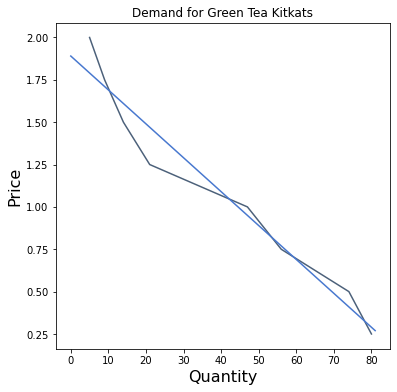

In [201]:
DemandGTK.plot("Qdemand", "priceGTK")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Green Tea Kitkats');
plt.plot(np.arange(0,81,0.01), gt_slope * np.arange(0,81,0.01) + gt_intercept)

In [202]:
#How many people does the Model think would buy at $1
solve = lambda x,y: sympy.solve(x-y)[0] if len(sympy.solve(x-y))==1 else "Not Single Solution"
Q = sympy.Symbol("Q")
demand = gt_slope * Q + gt_intercept
supply = 1
Q_Star=solve(demand,supply)
#Q_star = solve(demand, supply) # our version of solve is simplified for single solution systems
Q_Star

44.4970059880239

Consumer surplus is equal to green triangle: 20.025


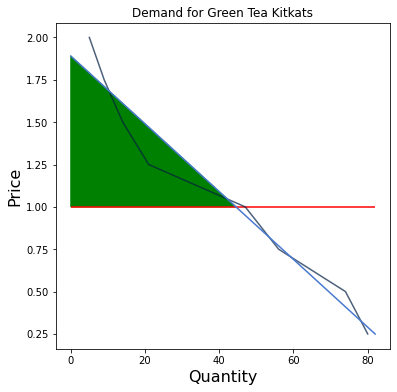

In [203]:
DemandGTK.plot("Qdemand", "priceGTK")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Green Tea Kitkats')
plt.plot(np.arange(0,82,0.01), gt_slope * np.arange(0,82,0.01) + gt_intercept)
plt.hlines(1,0,82, color ='r')
#plt.hlines(y = 1, xmin = 0, xmax = 82, color ='r')

#model_q= gt_slope *1 + gt_intercept)
triangle1 = patches.Polygon([[0,1],[Q_Star,1],[0,1.89]],True,color="green")
currentAxis = plt.gca()
currentAxis.add_patch(triangle1)

print("Consumer surplus is equal to green triangle: "+str(0.5*(1.89-1)*45))


In [188]:
DemandGTK.sort("priceGTK", descending = True)

priceGTK,Qdemand
2,5
1.75,9
1.5,14
1.25,21
1,47
0.75,56
0.5,74
0.25,80


##  Let's try again for Burritos 

In [51]:
BurritosTable=DemandTable.select('Burrito')
BurritosTable


Burrito
12.5
5
12.5
5
17.5
15
5
10
12.5
12.5


In [52]:
DemandBurr= Table().with_columns([
    'priceBurr',[2.5, 5, 7.5, 10.00, 12.5, 15,17.5,20],    
])
DemandBurr

priceBurr
2.5
5
7.5
10
12.5
15
17.5
20


In [56]:

Qdemand = np.flip(np.cumsum(np.flip(BurritosTable.group("Burrito").column("count"))))
#if "20" not in BurritosTable.column("Burrito"):
 #   Qdemand = np.append(Qdemand, 0)

In [57]:
DemandBurr=DemandBurr.with_columns('Qdemand',Qdemand)
DemandBurr

priceBurr,Qdemand
2.5,50
5,48
7.5,38
10,23
12.5,13
15,6
17.5,3
20,2


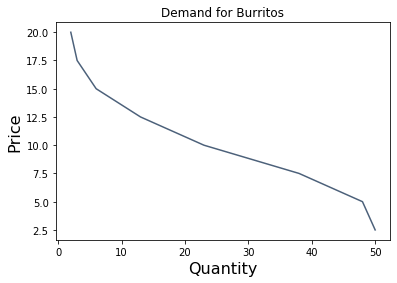

In [58]:
DemandBurr.plot("Qdemand", "priceBurr")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Burritos');

## Section 2  - fun with widgets

In [204]:
import sympy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
p = sympy.Symbol("p")
def Equilibrium(demandParam, supplyParam, priceStart):
    demandEquation = demandParam - p
    # change the slope
    supplyEquation = p * (supplyParam/10)
    priceEnd = sympy.solve(demandEquation)[0]
    prices = []
    demandQ = []
    supplyQ = []
    for price in range(priceStart,priceEnd+1):
        prices += [price]
        demandQ += [demandEquation.subs(p,price)]
        supplyQ += [supplyEquation.subs(p,price)]
    
    equilibriumP = sympy.solve(demandEquation-supplyEquation)[0]
    equilibriumQ = demandEquation.subs(p,equilibriumP)
    
    
    
    triangle1 = patches.Polygon([[equilibriumQ,equilibriumP],[0,equilibriumP],[0,priceEnd]],True,color="green")
    triangle2 = patches.Polygon([[equilibriumQ,equilibriumP],[0,equilibriumP],[0,0]],True,color="red")
    currentAxis = plt.gca()
    currentAxis.add_patch(triangle1)
    currentAxis.add_patch(triangle2)
    
    plt.plot(demandQ,prices)
    plt.plot(supplyQ,prices)
    plt.legend(["Demand","Supply"])
    plt.plot(equilibriumQ,equilibriumP, 'ro')
    plt.xlabel("Supply and Demand Quantity")
    plt.ylabel("Price")
    plt.ylim(0, 15)
    plt.xlim(0, 10)
    plt.show()
    print("The equilibrium price is "+str(round(equilibriumP,2))+" and equilibrium quantity is "+str(round(equilibriumQ,2))+".")
    print("The consumer surplus at this equilibrium "+str((priceEnd-equilibriumP)*(equilibriumQ)*.5))
    print("The producer surplus at this equilibrium "+str((equilibriumP)*(equilibriumQ)*.5))
# you can change the range here
slider1 = widgets.IntSlider(min=5, max=15,step=1,value=10)
slider2 = widgets.IntSlider(min=1, max=20,step=1,value=10)
slider3 = widgets.IntSlider(min=-5, max=5,step=1,value=0)
display(widgets.interactive(Equilibrium, demandParam=slider1, supplyParam=slider2, priceStart=slider3))

interactive(children=(IntSlider(value=10, description='demandParam', max=15, min=5), IntSlider(value=10, descr…

In [205]:
def eqSolve(eq1,eq2,tax):
    demandP = sympy.solve(eq1-q,p)[0]
    supplyP = sympy.solve(eq2-q,p)[0]
    demandP = demandP-cTax
    supplyP = supplyP+pTax

    demandQ = sympy.solve(demandP-p,q)[0]
    supplyQ = sympy.solve(supplyP-p,q)[0]
    
    return sympy.solve((demandP-supplyP, demandQ-supplyQ,tax-cTax-pTax), q,p,cTax,pTax)[q]

In [206]:
import sympy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
p = sympy.Symbol("p")
q = sympy.Symbol("q")
cTax = sympy.Symbol("cTax")
pTax = sympy.Symbol("pTax")

def EquilibriumTax(demandParam,supplyParam,priceStart,priceEnd,tax):
    demandEquation = demandParam - p
    supplyEquation = p * (supplyParam/10)
    prices = []
    demand = []
    supply = []
    for price in range(priceStart,priceEnd+1):
        prices += [price]
        demand += [demandEquation.subs(p,price)]
        supply += [supplyEquation.subs(p,price)]
        
    
    
    nonTaxPrice = sympy.solve(demandEquation-supplyEquation)[0]
    nonTaxQ = demandEquation.subs(p,nonTaxPrice)

    
    equilibriumQ = eqSolve(demandEquation,supplyEquation,tax)
    equilibriumP1 = sympy.solve(demandEquation-equilibriumQ)[0]
    equilibriumP2 = sympy.solve(supplyEquation-equilibriumQ)[0]
    
    triangle1 = patches.Polygon([[nonTaxQ,nonTaxPrice],[equilibriumQ,nonTaxPrice],[equilibriumQ,equilibriumP1]],True,color="green")
    triangle2 = patches.Polygon([[nonTaxQ,nonTaxPrice],[equilibriumQ,nonTaxPrice],[equilibriumQ,equilibriumP2]],True)
    currentAxis = plt.gca()
    currentAxis.add_patch(triangle1)
    currentAxis.add_patch(triangle2)
    
    
    rect1 = patches.Rectangle((0,nonTaxPrice),equilibriumQ,equilibriumP1-nonTaxPrice,linewidth=1,facecolor="red")
    rect2 = patches.Rectangle((0,nonTaxPrice),equilibriumQ,equilibriumP2-nonTaxPrice,linewidth=1,facecolor="yellow")
    currentAxis.add_patch(rect1)
    currentAxis.add_patch(rect2)
    
    plt.plot(demand,prices)
    plt.plot(supply,prices)
    
    
    plt.legend([rect1,rect2,triangle1,triangle2], ["Consumer Tax","Producer Tax","Consumer Deadweight Loss","Producer Deadweight Loss"])
    plt.plot(equilibriumQ,equilibriumP1, 'ro')
    plt.plot(equilibriumQ,equilibriumP2, 'ro')
    plt.xlabel("Supply and Demand Quantity")
    plt.ylabel("Price")
    plt.ylim(0, 15)
    plt.xlim(0, 10)
    plt.show()
    print("Without Tax - the equilibrium price is "+str(round(nonTaxPrice,2))+" and equilibrium quantity is "+str(round(nonTaxQ,2)))
    print("With Tax - Price paid by consumers is "+str(equilibriumP1)+" Price received by suppliers is "+str(round(equilibriumP2,2))+" and equilibrium quantity is "+str(equilibriumQ)+".")
    print("Taxes raised from consumers equals "+str(round(equilibriumQ*(equilibriumP1-nonTaxPrice),2)))
    print("Taxes raised from producers equals "+str(round(equilibriumQ*(nonTaxPrice-equilibriumP2),2)))
    print("Total taxes raised equals "+str(equilibriumQ*tax))

slider1 = widgets.IntSlider(min=5, max=15,step=1,value=10)
slider2 = widgets.IntSlider(min=1, max=20,step=1,value=10)
slider3 = widgets.IntSlider(min=-5, max=5,step=1,value=0)
slider4 = widgets.IntSlider(min=5, max=20,step=1,value=10)
slider5 = widgets.IntSlider(min=0, max=8,step=1,value=4)
display(widgets.interactive(EquilibriumTax, demandParam=slider1, supplyParam=slider2, priceStart=slider3, priceEnd=slider4, tax=slider5))

interactive(children=(IntSlider(value=10, description='demandParam', max=15, min=5), IntSlider(value=10, descr…